In [13]:
import pandas as pd
import seaborn as sns
import missingno as msno
import matplotlib.pyplot as plt
# importing sys
import sys
# adding helper_func to the system path
sys.path.insert(0, '../helper_functions/')
# importing actual functions
from helper_functions import character_df, fillna_centrl_tendcy, null_reminders, turkey_outliers,pre_process
pd.set_option('display.max_columns', None)

In [2]:
damage_assessment = pd.read_csv('../../Data/csv_building_damage_assessment.csv')
building_ownership = pd.read_csv('../../Data/csv_building_ownership_and_use.csv')
building_structure = pd.read_csv('../../Data/csv_building_structure.csv')
district_Ind_demo = pd.read_csv('../../Data/individual_demographics_individual_social_security/csv_individual_demographics.csv') 
district_Ind_SS = pd.read_csv('../../Data/individual_demographics_individual_social_security/csv_individual_social_security.csv')

/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (17,29,34,35,36,37,38,39,40,41,42,47,50) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
print(damage_assessment.shape)
damage_assessment.isnull().sum()

(762106, 79)


building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
damage_overall_collapse               261363
                                       ...  
has_geotechnical_risk_liquefaction         0
has_geotechnical_risk_landslide            0
has_geotechnical_risk_rock_fall            0
has_geotechnical_risk_flood                0
has_geotechnical_risk_other                0
Length: 79, dtype: int64

Ideally the solid bars are what we want to see so that we can combine this dataset with the building structure to then begin predicting damage grade of each building (joinging via building id).

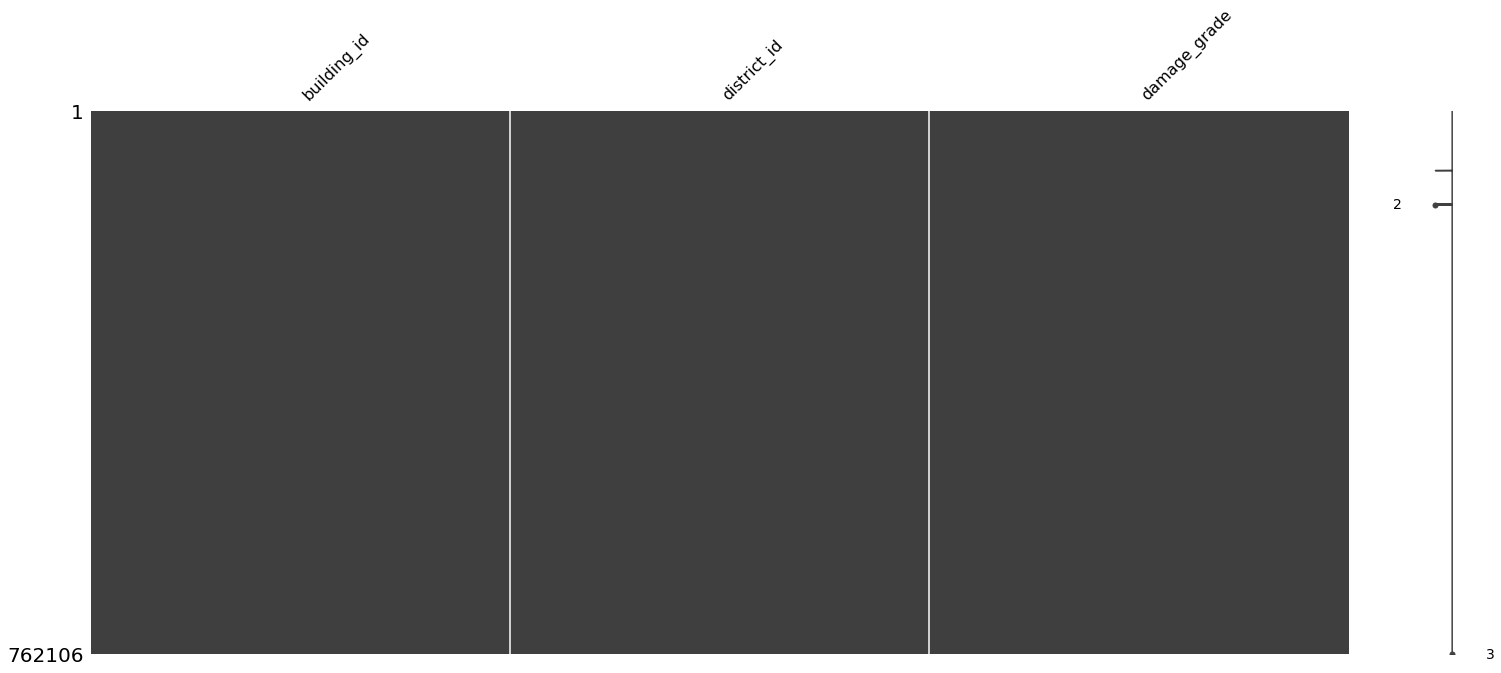

In [11]:
msno.matrix(damage_assessment[['building_id','district_id','damage_grade']]);

In [5]:
damage_assessment[['building_id','building_id','damage_grade']].head() # target column is 'damage_grade'

,building_id,building_id,damage_grade
0,120101000011,120101000011,Grade 3
1,120101000021,120101000021,Grade 5
2,120101000031,120101000031,Grade 2
3,120101000041,120101000041,Grade 2
4,120101000051,120101000051,Grade 1


In [6]:
damage_assessment['damage_grade'].unique()

array(['Grade 3', 'Grade 5', 'Grade 2', 'Grade 1', 'Grade 4', nan],
      dtype=object)

In [7]:
print(damage_assessment['building_id'].nunique())
damage_assessment[['damage_grade']].dropna().nunique()

762106


damage_grade    5
dtype: int64

## Target Feature - Imbalanced
For Reference the actual meanings of each different grade: <br>

Grade 1 : Hairline to thin cracks in plaster on few walls, falling of plaster bits in limited parts, fall of loose stone from upper part of the building in a few cases, only architectural repairs needed.

Grade 2 : Cracks in many walls, falling of plaster in last bits over large area, damage to non structural parts like chimney, projecting cornices. The load carrying capacity of the building is not reduced appreciably.

Grade 3 : Large and extensive cracks in most walls, collapse of small portion of non load-bearing walls, roof tile detachment, tilting or failing of chimneys, failure of individual non-structural elements such as partition/gable walls, delamination of stone/adobe walls, load carrying capacity of structure is partially reduced and significant structural repair is required.

Grade 4 : Large gaps occur in walls, walls collapse, partial structural failure of floor/roof, building takes a dangerous state.

Grade 5 : Total or near collapse of the building

---
Building Ownership

In [7]:
building_ownership.isnull().sum()

building_id                       0
district_id                       0
vdcmun_id                         0
ward_id                           0
legal_ownership_status            0
count_families                    2
has_secondary_use                10
has_secondary_use_agriculture     0
has_secondary_use_hotel           0
has_secondary_use_rental          0
has_secondary_use_institution     0
has_secondary_use_school          0
has_secondary_use_industry        0
has_secondary_use_health_post     0
has_secondary_use_gov_office      0
has_secondary_use_use_police      0
has_secondary_use_other           0
dtype: int64

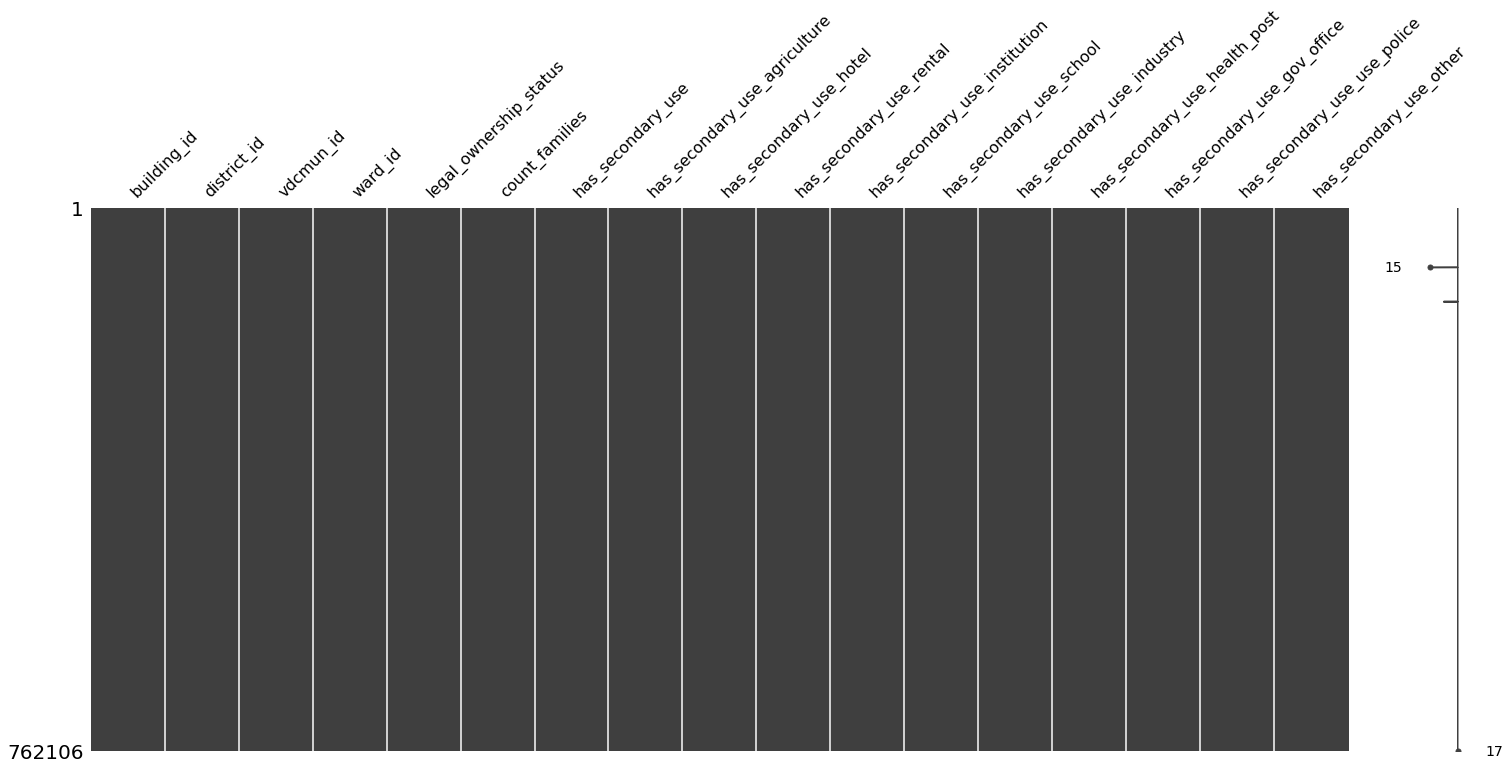

In [15]:
msno.matrix(building_ownership);

In [11]:
building_ownership.columns

Index(['building_id', 'district_id', 'vdcmun_id', 'ward_id',
       'legal_ownership_status', 'count_families', 'has_secondary_use',
       'has_secondary_use_agriculture', 'has_secondary_use_hotel',
       'has_secondary_use_rental', 'has_secondary_use_institution',
       'has_secondary_use_school', 'has_secondary_use_industry',
       'has_secondary_use_health_post', 'has_secondary_use_gov_office',
       'has_secondary_use_use_police', 'has_secondary_use_other'],
      dtype='object')

In [16]:
building_ownership.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


---
Building Structure

In [8]:
print(building_structure.shape)
building_structure.head()

(762106, 31)


,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,Grade 3,Major repair
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,Grade 5,Reconstruction
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 2,Minor repair
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,Grade 1,Minor repair


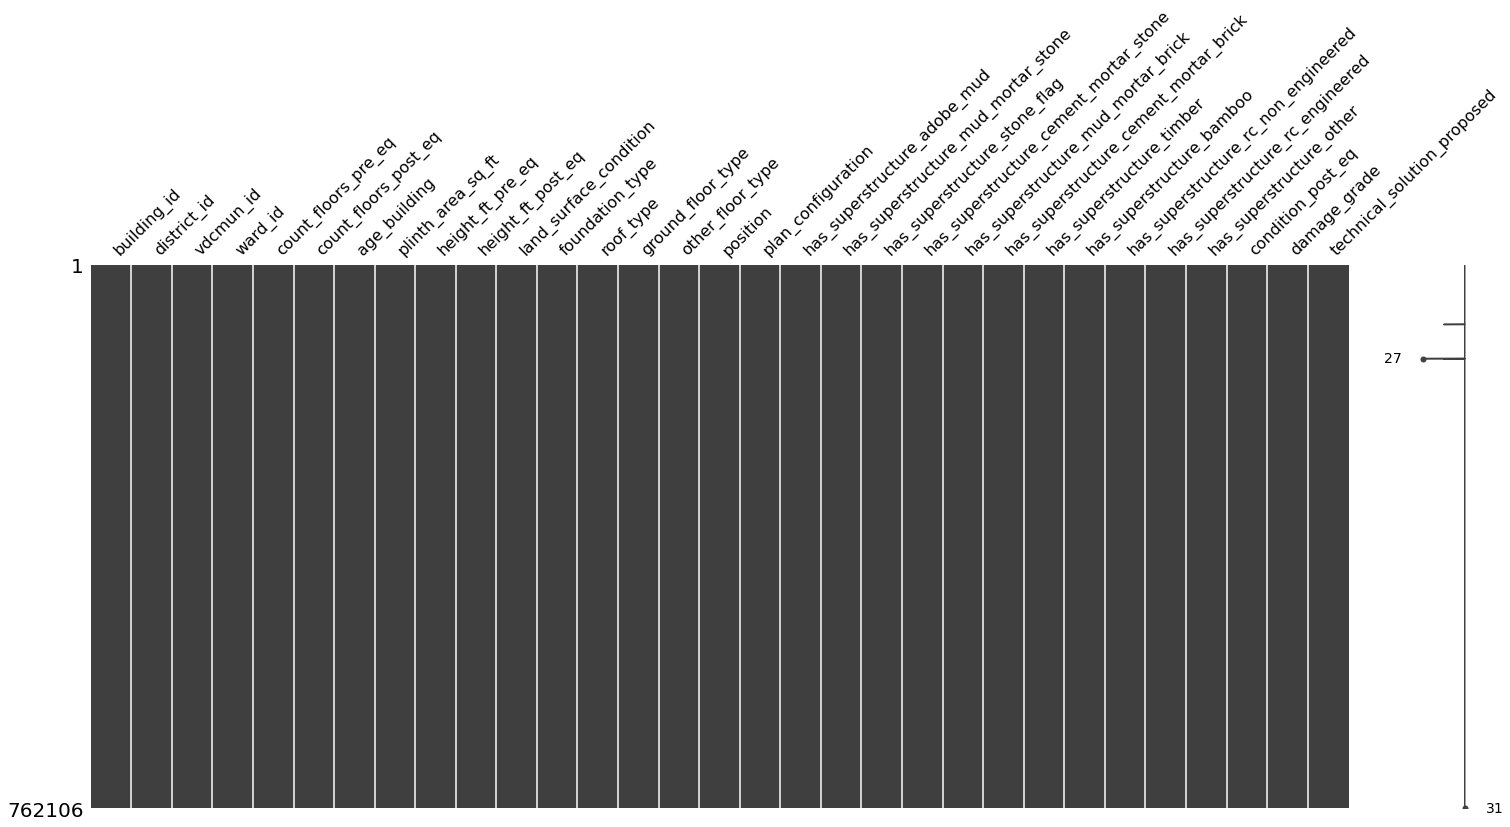

In [30]:
# checking out null values
msno.matrix(building_structure);

In [3]:
building_structure.isnull().sum()

building_id                                0
district_id                                0
vdcmun_id                                  0
ward_id                                    0
count_floors_pre_eq                        0
count_floors_post_eq                       0
age_building                               0
plinth_area_sq_ft                          0
height_ft_pre_eq                           0
height_ft_post_eq                          0
land_surface_condition                     0
foundation_type                            0
roof_type                                  0
ground_floor_type                          0
other_floor_type                           0
position                                   1
plan_configuration                         1
has_superstructure_adobe_mud               0
has_superstructure_mud_mortar_stone        0
has_superstructure_stone_flag              0
has_superstructure_cement_mortar_stone     0
has_superstructure_mud_mortar_brick        0
has_supers

In [78]:
print(building_structure.shape)

(762106, 31)


In [93]:
# looking at the nulls in the dataset to see what kind of buildings are missing values
building_structure[building_structure['technical_solution_proposed'].isnull()==True][['building_id','district_id','vdcmun_id','ward_id','ground_floor_type','condition_post_eq','foundation_type','roof_type','plan_configuration','technical_solution_proposed','damage_grade']]

,building_id,district_id,vdcmun_id,ward_id,ground_floor_type,condition_post_eq,foundation_type,roof_type,plan_configuration,technical_solution_proposed,damage_grade
83766,203202000521,20,2009,200910,Mud,Damaged-Repaired and used,Bamboo/Timber,Bamboo/Timber-Light roof,Rectangular,NaN,NaN
131558,212402000211,21,2107,210703,Mud,Damaged-Used in risk,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Rectangular,NaN,NaN
131579,212402000221,21,2107,210703,Mud,Damaged-Used in risk,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Rectangular,NaN,NaN
131627,212402000071,21,2107,210703,Mud,Damaged-Used in risk,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Rectangular,NaN,NaN
131629,212402000091,21,2107,210703,Mud,Damaged-Used in risk,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Rectangular,NaN,NaN
131640,212402000201,21,2107,210703,Mud,Damaged-Used in risk,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Rectangular,NaN,NaN
131652,212402000341,21,2107,210703,Mud,Damaged-Repaired and used,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,NaN,NaN,NaN
131654,212402000361,21,2107,210703,Mud,Damaged-Repaired and used,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Rectangular,NaN,NaN
131655,212402000371,21,2107,210703,Mud,Damaged-Repaired and used,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Rectangular,NaN,NaN
131656,212402000381,21,2107,210703,Mud,Damaged-Repaired and used,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Rectangular,NaN,NaN


In [101]:
# making sure that I know what to replace the nulls in the two columns with the largest characteristics per grade
building_structure.groupby('damage_grade')['technical_solution_proposed'].value_counts()

damage_grade  technical_solution_proposed
Grade 1       No need                         51285
              Minor repair                    26946
              Major repair                      384
              Reconstruction                    200
Grade 2       Minor repair                    73991
              Major repair                    10383
              Reconstruction                   2395
              No need                           488
Grade 3       Major repair                   101292
              Reconstruction                  25598
              Minor repair                     9466
              No need                            56
Grade 4       Reconstruction                 166446
              Major repair                    17213
              Minor repair                      173
              No need                            12
Grade 5       Reconstruction                 275580
              Major repair                      143
              Minor re

In [4]:
building_structure['damage_grade'] = building_structure['damage_grade'].str.replace('Grade','').fillna(5).astype(int)
building_structure['technical_solution_proposed'] = building_structure['technical_solution_proposed'].fillna('Reconstruction')
building_structure['plan_configuration'].iloc[131652] = 'Rectangular'
# ensuring that the nulls are now all filled in !
print(building_structure.isnull().sum().sum())
building_structure[building_structure['technical_solution_proposed'].isnull()==True][['district_id','vdcmun_id','ward_id','ground_floor_type','condition_post_eq','foundation_type','roof_type','plan_configuration','technical_solution_proposed','damage_grade']]


/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


1


,district_id,vdcmun_id,ward_id,ground_floor_type,condition_post_eq,foundation_type,roof_type,plan_configuration,technical_solution_proposed,damage_grade


In [171]:
building_structure[building_structure['position'].isnull()==True]

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed
131652,212402000341,21,2107,210703,2,2,84,324,13,13,Flat,Mud mortar-Stone/Brick,Bamboo/Timber-Light roof,Mud,Timber-Planck,NaN,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,5,Reconstruction


In [170]:
# looking as low a level as possible to figure out what to impute position with
building_structure[(building_structure['district_id']==21)&(building_structure['vdcmun_id']==2107)&(building_structure['ward_id']==210703)]['position'].value_counts()

Not attached       802
Attached-1 side    162
Attached-2 side      1
Name: position, dtype: int64

In [5]:
# filling in null and confiming no more nulls are in the dataset
building_structure['position'].fillna('Not attached',inplace=True)
print('column with 1 null value: ',building_structure.columns[building_structure.isnull().any()].tolist())

column with 1 null value:  []


No more nulls! 

---

In [175]:
# looking at the secondary dataset 
building_ownership.head()

,building_id,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [174]:
building_ownership.isnull().sum()

building_id                       0
district_id                       0
vdcmun_id                         0
ward_id                           0
legal_ownership_status            0
count_families                    2
has_secondary_use                10
has_secondary_use_agriculture     0
has_secondary_use_hotel           0
has_secondary_use_rental          0
has_secondary_use_institution     0
has_secondary_use_school          0
has_secondary_use_industry        0
has_secondary_use_health_post     0
has_secondary_use_gov_office      0
has_secondary_use_use_police      0
has_secondary_use_other           0
dtype: int64

In [181]:
building_ownership.columns

Index(['district_id', 'vdcmun_id', 'ward_id', 'legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture',
       'has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school',
       'has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police',
       'has_secondary_use_other'],
      dtype='object')

In [184]:
# if all other ownership columns have 0 can assume that these NaN values likely have secondary use
building_ownership[building_ownership['has_secondary_use'].isnull()==True][['legal_ownership_status',
       'count_families', 'has_secondary_use', 'has_secondary_use_agriculture','has_secondary_use_hotel', 'has_secondary_use_rental',
       'has_secondary_use_institution', 'has_secondary_use_school','has_secondary_use_industry', 'has_secondary_use_health_post',
       'has_secondary_use_gov_office', 'has_secondary_use_use_police','has_secondary_use_other']]

,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,
203202000521,Private,NaN,NaN,0,0,0,0,0,0,0,0,0,0
212402000211,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0
212402000221,Private,2.0,NaN,0,0,0,0,0,0,0,0,0,0
212402000071,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0
212402000091,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0
212402000201,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0
212402000341,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0
212402000361,Private,2.0,NaN,0,0,0,0,0,0,0,0,0,0
212402000371,Private,1.0,NaN,0,0,0,0,0,0,0,0,0,0


Looking at the locations of these null values it is clearly noteable that all of these buildings are also the same ones that contained nulls in their building_structure dataframe nearly all from district 21, vdcmun_id 2107, and ward_id 210703.

In [180]:
# looking at these nulls it appears that these are the same buildings that did not have reported dam
building_ownership[(building_ownership['district_id']==21)&(building_ownership['vdcmun_id']==2107)&(building_ownership['ward_id']==210703)]['has_secondary_use'].value_counts()

0.0    912
1.0     45
Name: has_secondary_use, dtype: int64

In [6]:
# despite these building having secondary use being generally 0 I will impute with 1 because all other columns related to building use are 0
building_ownership['has_secondary_use'].fillna(1,inplace=True)

In [189]:
building_ownership[(building_ownership['district_id']==21)&(building_ownership['vdcmun_id']==2107)&(building_ownership['ward_id']==210703)]['has_secondary_use'].value_counts()

0.0    912
1.0     54
Name: has_secondary_use, dtype: int64

Moving on to second column with NaN values only to so just will impute with majority class 

In [186]:
building_ownership[building_ownership['count_families'].isnull()==True]

,district_id,vdcmun_id,ward_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,
203201090341,20,2009,200910,Private,NaN,0.0,0,0,0,0,0,0,0,0,0,0
203202000521,20,2009,200910,Private,NaN,1.0,0,0,0,0,0,0,0,0,0,0


In [190]:
building_ownership['count_families'].value_counts()

1.0     643418
0.0      71576
2.0      39753
3.0       5685
4.0       1215
5.0        302
6.0        104
7.0         27
8.0         15
9.0          8
11.0         1
Name: count_families, dtype: int64

In [7]:
building_ownership['count_families'].fillna(1.0,inplace=True)
building_ownership['count_families'].value_counts()

1.0     643420
0.0      71576
2.0      39753
3.0       5685
4.0       1215
5.0        302
6.0        104
7.0         27
8.0         15
9.0          8
11.0         1
Name: count_families, dtype: int64

---
Merging the Two relevant datasets: <br>
building_ownership and building_structure

In [176]:
# setting indexes for concatenation later
building_structure.set_index('building_id',inplace=True)
print(building_structure.index[:4])
building_ownership.set_index('building_id',inplace=True)
print(building_ownership.index[:4])

Int64Index([120101000011, 120101000021, 120101000031, 120101000041], dtype='int64', name='building_id')
Int64Index([120101000011, 120101000021, 120101000031, 120101000041], dtype='int64', name='building_id')


In [43]:
result = pd.concat([building_structure, building_ownership.drop(columns=['district_id','vdcmun_id','ward_id'])], axis=1).reindex(building_structure.index)

In [9]:
result.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,building_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Used in risk,3,Major repair,120101000011,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,1,0,0,0,Damaged-Repaired and used,5,Reconstruction,120101000021,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,Minor repair,120101000031,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,2,Minor repair,120101000041,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,0,1,0,0,0,0,0,0,0,0,0,Damaged-Repaired and used,1,Minor repair,120101000051,Private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [10]:
print('There are ',result.shape[0],'buildings in this combined dataset.')

There are  762106 buildings in this combined dataset.


There appear to be very few missing values, which can be imputed on a district and municipality level once compined into the ownership dataframe.

In [195]:
max_num_list=[result[column].max() if str( result[column].dtypes )!='object' else 'cat.'  for column in result  ]
min_num_list=[result[column].min() if str( result[column].dtypes )!='object' else 'cat.'  for column in result  ]
charac_df = character_df(result)
charac_df['max_num'] = max_num_list
charac_df['min_num'] = min_num_list
charac_df

,column_name,null_count,percent_missing,categorical_unique,dtypes,max_num,min_num
0,district_id,0,0.0,not cat.,int64,36,12
1,vdcmun_id,0,0.0,not cat.,int64,3611,1201
2,ward_id,0,0.0,not cat.,int64,361108,120101
3,count_floors_pre_eq,0,0.0,not cat.,int64,9,1
4,count_floors_post_eq,0,0.0,not cat.,int64,9,0
5,age_building,0,0.0,not cat.,int64,999,0
6,plinth_area_sq_ft,0,0.0,not cat.,int64,5000,70
7,height_ft_pre_eq,0,0.0,not cat.,int64,99,6
8,height_ft_post_eq,0,0.0,not cat.,int64,99,0
9,land_surface_condition,0,0.0,"[Flat, Moderate slope, Steep slope]",object,cat.,cat.


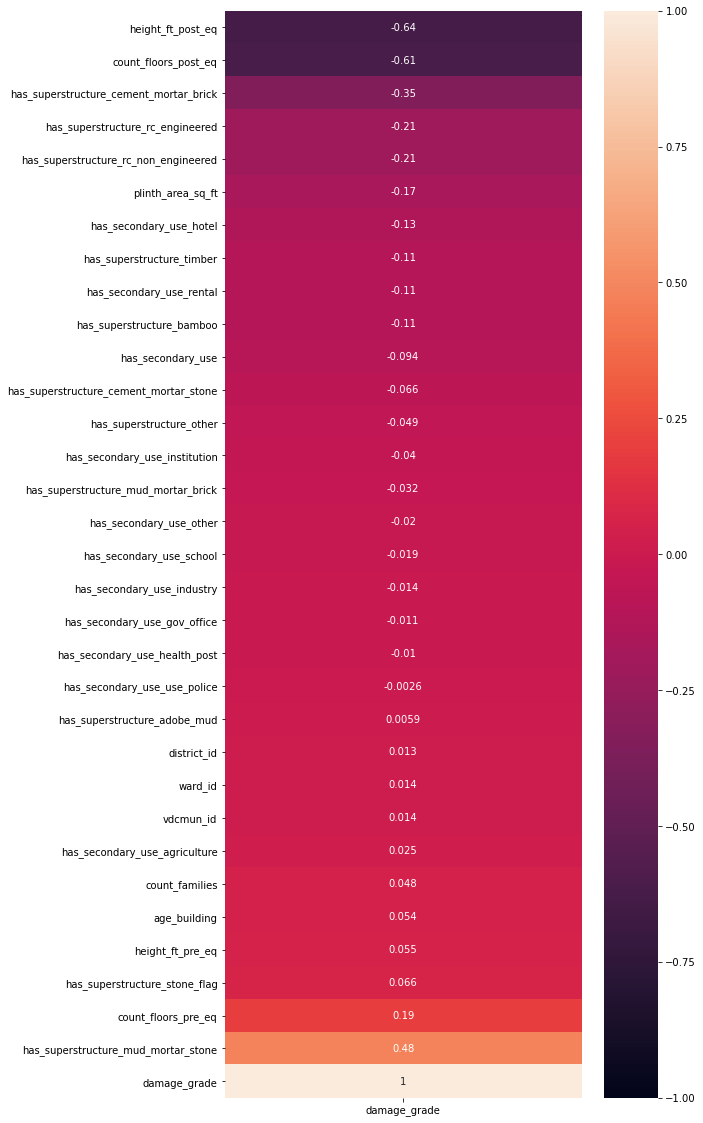

In [199]:
plt.figure(figsize=(8,20))
corr = result.corr()[['damage_grade']].sort_values('damage_grade') 
sns.heatmap(corr, annot = True, vmin = -1, vmax = 1);
#results_path = '../../Viz/acres_burned_dummified_df.png'
#print(results_path)
#plt.savefig(results_path);

Needing to format that catergorical columns for future input use there appear to be about 10 columns that are not numerically represented.

In [11]:
categorical = ['object']
catdf = result.copy().select_dtypes(include=categorical)
catdf.head()

,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,condition_post_eq,technical_solution_proposed,legal_ownership_status
0,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Used in risk,Major repair,Private
1,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Reconstruction,Private
2,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Minor repair,Private
3,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Minor repair,Private
4,Flat,Other,Bamboo/Timber-Light roof,Mud,Not applicable,Not attached,Rectangular,Damaged-Repaired and used,Minor repair,Private


In [207]:
catdf.head().T

building_id,120101000011,120101000021,120101000031,120101000041,120101000051
land_surface_condition,Flat,Flat,Flat,Flat,Flat
foundation_type,Other,Other,Other,Other,Other
roof_type,Bamboo/Timber-Light roof,Bamboo/Timber-Light roof,Bamboo/Timber-Light roof,Bamboo/Timber-Light roof,Bamboo/Timber-Light roof
ground_floor_type,Mud,Mud,Mud,Mud,Mud
other_floor_type,Not applicable,Not applicable,Not applicable,Not applicable,Not applicable
position,Not attached,Not attached,Not attached,Not attached,Not attached
plan_configuration,Rectangular,Rectangular,Rectangular,Rectangular,Rectangular
condition_post_eq,Damaged-Used in risk,Damaged-Repaired and used,Damaged-Repaired and used,Damaged-Repaired and used,Damaged-Repaired and used
technical_solution_proposed,Major repair,Reconstruction,Minor repair,Minor repair,Minor repair
legal_ownership_status,Private,Private,Private,Private,Private


In [41]:
# testing nlp cleaning function to apply to all values in a string function to apply to dataframe
catdf['roof_type'].apply(pre_process).str.replace(' ', '').str.lower().head()

0    bambootimberlightroof
1    bambootimberlightroof
2    bambootimberlightroof
3    bambootimberlightroof
4    bambootimberlightroof
Name: roof_type, dtype: object

In [44]:
for column in result.select_dtypes(include=categorical):
    result[column] = result[column].apply(pre_process).str.replace(' ', '_').str.lower() 

In [45]:
result.head()

,building_id,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,building_id,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
0,120101000011,12,1207,120703,1,1,9,288,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_used_in_risk,3,major_repair,120101000011,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
1,120101000021,12,1207,120703,1,1,15,364,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_repaired_and_used,5,reconstruction,120101000021,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
2,120101000031,12,1207,120703,1,1,20,384,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,120101000031,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
3,120101000041,12,1207,120703,1,1,20,312,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,120101000041,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
4,120101000051,12,1207,120703,1,1,30,308,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,1,minor_repair,120101000051,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [46]:
# looking at only categorical columns 
character_df(result.select_dtypes(include=categorical))

,column_name,null_count,percent_missing,categorical_unique,dtypes
0,land_surface_condition,0,0.0,"[flat, moderate_slope, steep_slope]",object
1,foundation_type,0,0.0,"[other, mud_mortar_stone_brick, cement_stone_b...",object
2,roof_type,0,0.0,"[bamboo_timber_light_roof, bamboo_timber_heavy...",object
3,ground_floor_type,0,0.0,"[mud, brick_stone, rc, timber, other]",object
4,other_floor_type,0,0.0,"[not_applicable, timber_bamboo_mud, timber_pla...",object
5,position,0,0.0,"[not_attached, attached__side]",object
6,plan_configuration,0,0.0,"[rectangular, l_shape, square, t_shape, multi_...",object
7,condition_post_eq,0,0.0,"[damaged_used_in_risk, damaged_repaired_and_us...",object
8,technical_solution_proposed,0,0.0,"[major_repair, reconstruction, minor_repair, n...",object
9,legal_ownership_status,0,0.0,"[private, other, institutional, public]",object


Looks good ready to export for EDA and modeling purposes

In [63]:
# apparently I forgot to drop the column id when concatenating so dropping duplicate here! 
result = result.iloc[: , 1:]

In [67]:
# setting index for the exporting process 
result.set_index('building_id',inplace=True)
print(result.index[:4])
result.head()

Int64Index([120101000011, 120101000021, 120101000031, 120101000041], dtype='int64', name='building_id')


,district_id,vdcmun_id,ward_id,count_floors_pre_eq,count_floors_post_eq,age_building,plinth_area_sq_ft,height_ft_pre_eq,height_ft_post_eq,land_surface_condition,foundation_type,roof_type,ground_floor_type,other_floor_type,position,plan_configuration,has_superstructure_adobe_mud,has_superstructure_mud_mortar_stone,has_superstructure_stone_flag,has_superstructure_cement_mortar_stone,has_superstructure_mud_mortar_brick,has_superstructure_cement_mortar_brick,has_superstructure_timber,has_superstructure_bamboo,has_superstructure_rc_non_engineered,has_superstructure_rc_engineered,has_superstructure_other,condition_post_eq,damage_grade,technical_solution_proposed,legal_ownership_status,count_families,has_secondary_use,has_secondary_use_agriculture,has_secondary_use_hotel,has_secondary_use_rental,has_secondary_use_institution,has_secondary_use_school,has_secondary_use_industry,has_secondary_use_health_post,has_secondary_use_gov_office,has_secondary_use_use_police,has_secondary_use_other
building_id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
120101000011,12,1207,120703,1,1,9,288,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_used_in_risk,3,major_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000021,12,1207,120703,1,1,15,364,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,1,0,0,0,damaged_repaired_and_used,5,reconstruction,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000031,12,1207,120703,1,1,20,384,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000041,12,1207,120703,1,1,20,312,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,2,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0
120101000051,12,1207,120703,1,1,30,308,9,9,flat,other,bamboo_timber_light_roof,mud,not_applicable,not_attached,rectangular,0,1,0,0,0,0,0,0,0,0,0,damaged_repaired_and_used,1,minor_repair,private,1.0,0.0,0,0,0,0,0,0,0,0,0,0


In [65]:
result.to_csv('../../Data/Complete_N_Cleaned.csv')

--- 
Looking at individual info by district:
- Demographic 
- Social Security 

In [39]:
district_Ind_SS.head()

,individual_id,district_id,vdcmun_id,ward_id,has_social_security_elder_citizen,has_social_security_child_security,has_social_security_extinct_caste,has_social_security_single_woman,has_social_security_handicap,has_social_security_pension,has_social_security_other,has_social_security_not_applicable,has_social_security_none
0,12010100001101001,12,1207,120703,0,0,0,0,0,0,0,1,0
1,12010100001101002,12,1207,120703,0,0,0,0,0,0,0,1,0
2,12010100001101003,12,1207,120703,0,0,0,0,0,0,0,1,0
3,12010100002101001,12,1207,120703,0,0,0,1,0,0,0,0,0
4,12010100002101002,12,1207,120703,0,0,0,0,0,0,0,1,0


In [40]:
district_Ind_demo.head()

,individual_id,district_id,vdcmun_id,ward_id,gender_individual,age_individual,presence_in_household,disability_individual,has_registered_birth,education_level_individual,marital_status_individual
0,12010100001101001,12,1207,120703,Male,31,Mostly Present,No,NaN,Illiterate,Married
1,12010100001101002,12,1207,120703,Female,58,Mostly Present,No,NaN,Illiterate,Married
2,12010100001101003,12,1207,120703,Male,15,Mostly Present,No,NaN,Class 7,Not Married
3,12010100002101001,12,1207,120703,Female,62,Mostly Present,No,NaN,Illiterate,Widow/Widower
4,12010100002101002,12,1207,120703,Male,23,Not present-Abroad,No,NaN,Class 6,Married
